In [1]:
import os
import sys
import random
import math
import re
import time
import copy
import numpy as np
import pandas as pd
import cv2
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import matplotlib.patches as patches
from sklearn.model_selection import StratifiedShuffleSplit

from config import Config
import utils
import model as modellib
import visualize
from model import log
import seaborn as sns
from visualize import display_images
import skimage
import nuclei
from IPython.core.debugger import set_trace



%matplotlib inline 

# Root directory of the project
ROOT_DIR = os.getcwd()

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

NUCLEI_DIR = "../../input"

/home/ubuntu/anaconda3/envs/tf_pycoco/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tf_pycoco/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tf_pycoco/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/home/ubuntu/anaconda3/envs/tf_pycoco/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
config = nuclei.NucleiConfig()
# config.display()

In [3]:
dataset = nuclei.NucleiDataset()
dataset.load_nuclei(NUCLEI_DIR, "train")
dataset.prepare()

dataset_test = nuclei.NucleiDataset()
dataset_test.load_nuclei(NUCLEI_DIR, "test")
dataset_test.prepare()

> /home/ubuntu/nuclei/solutions/kmrcnn/nuclei.py(121)load_nuclei()
    119         set_trace()
    120         # Add Images
--> 121         self.real_to_id = {}
    122         for idx, i in enumerate(image_ids):
    123             i_path = os.path.join(image_dir, i, 'images', i + '.png')

ipdb> 
ipdb> c
> /home/ubuntu/nuclei/solutions/kmrcnn/nuclei.py(121)load_nuclei()
    119         set_trace()
    120         # Add Images
--> 121         self.real_to_id = {}
    122         for idx, i in enumerate(image_ids):
    123             i_path = os.path.join(image_dir, i, 'images', i + '.png')

ipdb> c


(260, 347, 3)
(260, 347, 1)


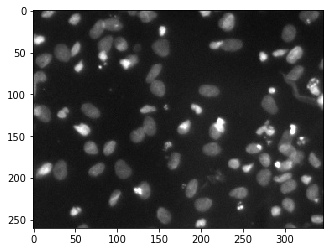

In [4]:
img = dataset.load_image("7b38c9173ebe69b4c6ba7e703c0c27f39305d9b2910f46405993d2ea7a963b80")
print(img.shape)
plt.imshow(img)
print(dataset.load_mask("7b38c9173ebe69b4c6ba7e703c0c27f39305d9b2910f46405993d2ea7a963b80")[0].shape)

In [5]:
data_train, data_val = dataset.extract_train_val()

> /home/ubuntu/nuclei/solutions/kmrcnn/nuclei.py(121)load_nuclei()
    119         set_trace()
    120         # Add Images
--> 121         self.real_to_id = {}
    122         for idx, i in enumerate(image_ids):
    123             i_path = os.path.join(image_dir, i, 'images', i + '.png')

ipdb> c
> /home/ubuntu/nuclei/solutions/kmrcnn/nuclei.py(121)load_nuclei()
    119         set_trace()
    120         # Add Images
--> 121         self.real_to_id = {}
    122         for idx, i in enumerate(image_ids):
    123             i_path = os.path.join(image_dir, i, 'images', i + '.png')

ipdb> c
> /home/ubuntu/nuclei/solutions/kmrcnn/nuclei.py(220)extract_train_val()
    218         # dataset_val = NucleiDataset().load_nuclei(image_ids=val)
    219         set_trace()
--> 220         return dataset_train, dataset_val
    221         # dataset_train = copy.deepcopy(self)
    222         # dataset_val = copy.deepcopy(self)

ipdb> c


In [8]:
data_train.prepare()
data_val.prepare()

In [25]:
img = data_train.load_image("7b38c9173ebe69b4c6ba7e703c0c27f39305d9b2910f46405993d2ea7a963b80")
print(img.shape)
# plt.imshow( datasets["train"][1].load_mask("7b38c9173ebe69b4c6ba7e703c0c27f39305d9b2910f46405993d2ea7a963b80")[0])

KeyError: '7b38c9173ebe69b4c6ba7e703c0c27f39305d9b2910f46405993d2ea7a963b80'

In [27]:
data_train.real_to_id

{'00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552.png': 143,
 '003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1.png': 98,
 '00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e.png': 517,
 '0121d6759c5adb290c8e828fc882f37dfaf3663ec885c663859948c154a443ed.png': 186,
 '01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf.png': 304,
 '0280fa8f60f6bcae0f97d93c28f60be194f9309ff610dc5845e60455b0f87c21.png': 356,
 '0287e7ee5b007c91ae2bd7628d09735e70496bc6127ecb7f3dd043e04ce37426.png': 455,
 '02903040e19ddf92f452907644ad3822918f54af41dd85e5a3fe3e1b6d6f9339.png': 99,
 '03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe.png': 21,
 '0402a81e75262469925ea893b6706183832e85324f7b1e08e634129f5d522cdd.png': 54,
 '04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e.png': 411,
 '05040e2e959c3f5632558fc9683fec88f0010026c555b499066346f67fdd0e13.png': 108,
 '0532c64c2fd0c4d3188cc751cdfd566b1cfba3d269358717295bab1504c7c275.p

In [7]:
# imgs = []
# for i in range(len(dataset.image_ids)):
#     img = dataset.load_image(i)
#     if img.shape[-1] != 3:
#         print("image {} has shape {}".format(i,img.shape))
#     imgs.append(img)
#     if i < len(dataset_test.image_ids):
#         img_test = dataset_test.load_image(i)
#         if img_test.shape[-1] != 3:
#             print("image {} has shape {}".format(i,img_test.shape))
#         imgs.append(img_test)
# # f_imgs = np.stack(imgs,axis=0)


In [8]:
# # Find the mean pixel of the 4 channels of the images in both training and testing.
# # Uncomment all if you didn't do it before. Obtain the value and then put it in
# # config class
# means = []
# for i in range(len(dataset.image_ids)):
#     if i < len(dataset_test.image_ids):
#         img_test = dataset_test.load_image(i)
#         mean_test = np.mean(img_test, axis=(0,1))
#         if img_test.shape[-1] != 4:
#             print("Test Image {} has {} dimensions".format(
#             i, img_test.shape))
#             mean_test = np.append(mean_test, [255.])
#         means.append(mean_test)
#     img_train = dataset.load_image(i)
#     if img_train.shape[-1] != 4:
#         print("Train Image {} has {} dimensions".format(
#         i, img_train.shape))
#     mean_train = np.mean(img_train, axis=(0,1))
#     means.append(mean_train)

# all_means = np.stack(means, axis=0)
# np.mean(all_means,axis=0)

276

(260, 347)


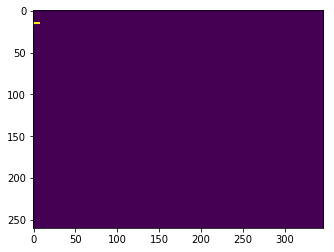

In [9]:
# Display troublesome images
trouble = "7b38c9173ebe69b4c6ba7e703c0c27f39305d9b2910f46405993d2ea7a963b80"
for i in range(len(dataset.image_ids)):
    if dataset.image_info[i]['id'] == trouble:
        print(i)
        img = dataset.load_image(i)
        mask, class_ids = dataset.load_mask(i)
plt.imshow(img)
m = mask[:, :, np.where(class_ids == 1)[0]]
print()
m = np.sum(m * np.arange(1, m.shape[-1] + 1), -1)
print(m.shape)
plt.imshow(m)

In [10]:
print("Image Count: {}".format(len(dataset.image_ids)))
print("Class Count: {}".format(dataset.num_classes))
for i, info in enumerate(dataset.class_info):
    print("{:3}. {:50}".format(i, info['name']))

Image Count: 670
Class Count: 2
  0. BG                                                
  1. nu                                                


## Display Samples

Load and display images and masks.

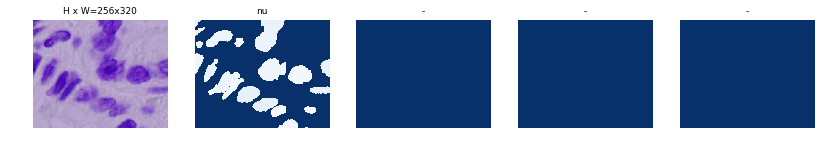

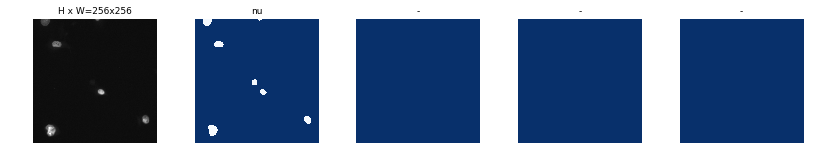

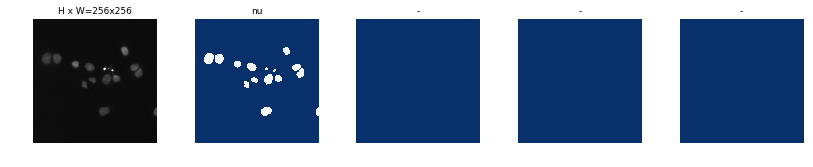

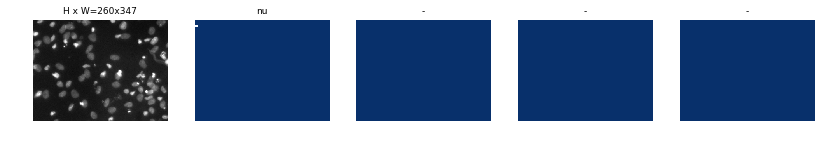

In [11]:
# Load and display random samples
image_ids = np.random.choice(dataset.image_ids, 3)
image_ids = np.append(image_ids, [276])
for image_id in image_ids:
    image = dataset.load_image(image_id)
    mask, class_ids = dataset.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset.class_names)

## Bounding Boxes

Rather than using bounding box coordinates provided by the source datasets, we compute the bounding boxes from masks instead. This allows us to handle bounding boxes consistently regardless of the source dataset, and it also makes it easier to resize, rotate, or crop images because we simply generate the bounding boxes from the updates masks rather than computing bounding box transformation for each type of image transformation.

image_id  29 a6515d73077866808ad4cb837ecdac33612527b8a1041e82135e40fce2bb9380
image                    shape: (256, 320, 3)         min:    2.00000  max:  255.00000
mask                     shape: (256, 320, 15)        min:    0.00000  max:  255.00000
class_ids                shape: (15,)                 min:    1.00000  max:    1.00000
bbox                     shape: (15, 4)               min:    0.00000  max:  320.00000


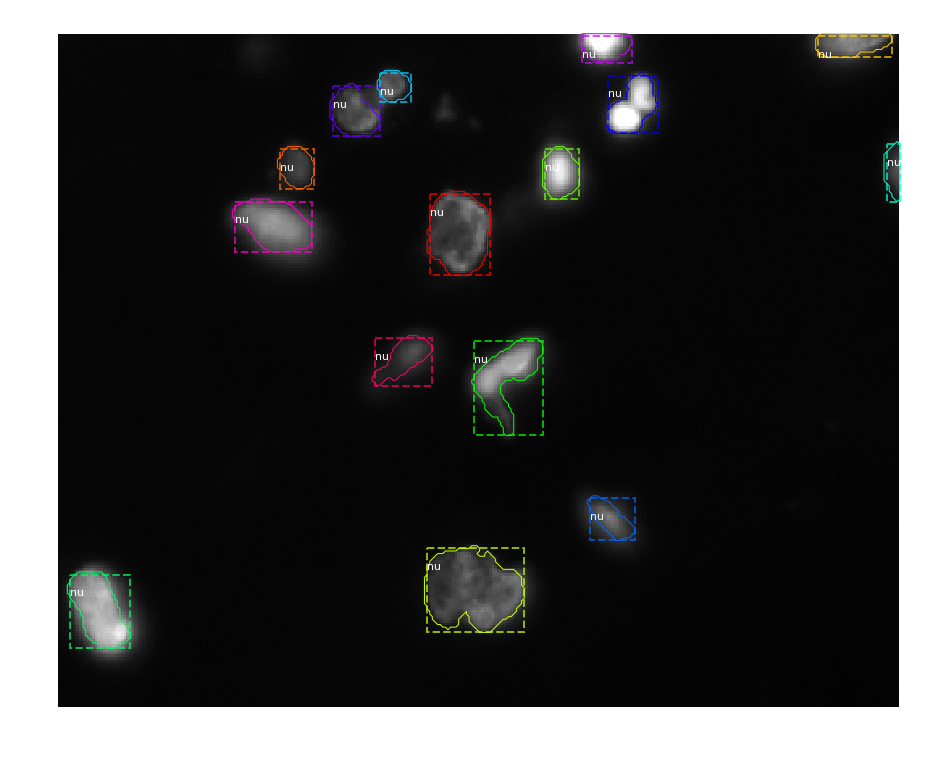

In [12]:
# Load random image and mask.
image_id = random.choice(dataset.image_ids)
# image_id = 407
image = dataset.load_image(image_id)
mask, class_ids = dataset.load_mask(image_id)
# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
print("image_id ", image_id, dataset.image_info[image_id]['id'])
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)
# Display image and instances
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)

## Resize Images

To support multiple images per batch, images are resized to one size (1024x1024). Aspect ratio is preserved, though. If an image is not square, then zero padding is added at the top/bottom or right/left.

image_id:  205 
Original shape:  (256, 256, 3)
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  145.00000
mask                     shape: (1024, 1024, 38)      min:    0.00000  max:  255.00000
class_ids                shape: (38,)                 min:    1.00000  max:    1.00000
bbox                     shape: (38, 4)               min:  112.00000  max:  912.00000


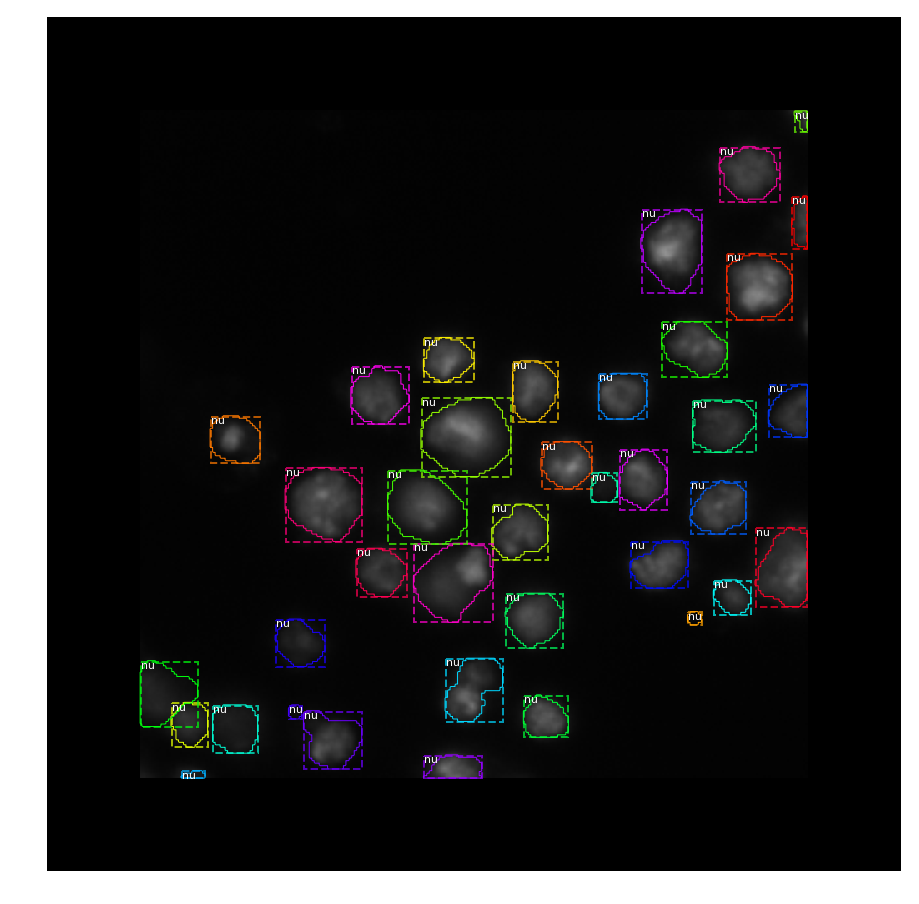

In [13]:
# Load random image and mask.
image_id = np.random.choice(dataset.image_ids, 1)[0]
# image_id = 210
image = dataset.load_image(image_id)
mask, class_ids = dataset.load_mask(image_id)
original_shape = image.shape
# Resize
image, window, scale, padding = utils.resize_image(
    image, 
    min_dim=config.IMAGE_MIN_DIM, 
    max_dim=config.IMAGE_MAX_DIM,
    padding=config.IMAGE_PADDING)
mask = utils.resize_mask(mask, scale, padding)
# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
print("image_id: ", image_id, dataset.image_reference(image_id))
print("Original shape: ", original_shape)
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)
# Display image and instances
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)

## Mini Masks

Instance binary masks can get large when training with high resolution images. For example, if training with 1024x1024 image then the mask of a single instance requires 1MB of memory (Numpy uses bytes for boolean values). If an image has 100 instances then that's 100MB for the masks alone. 

To improve training speed, we optimize masks by:
* We store mask pixels that are inside the object bounding box, rather than a mask of the full image. Most objects are small compared to the image size, so we save space by not storing a lot of zeros around the object.
* We resize the mask to a smaller size (e.g. 56x56). For objects that are larger than the selected size we lose a bit of accuracy. But most object annotations are not very accuracy to begin with, so this loss is negligable for most practical purposes. Thie size of the mini_mask can be set in the config class.

To visualize the effect of mask resizing, and to verify the code correctness, we visualize some examples.

image                    shape: (1024, 1024, 3)       min:    0.00000  max:  126.00000
image_meta               shape: (10,)                 min:    1.00000  max:  912.00000
class_ids                shape: (39,)                 min:    1.00000  max:    1.00000
bbox                     shape: (39, 4)               min:  112.00000  max:  912.00000
mask                     shape: (1024, 1024, 39)      min:    0.00000  max:  255.00000


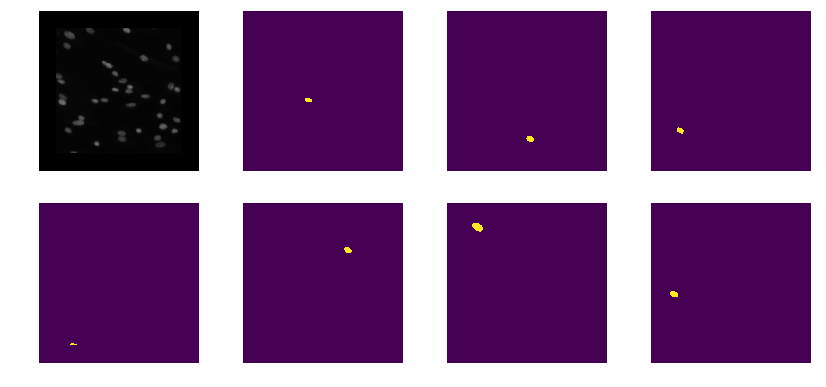

In [14]:
# image_id = 342
image_id = np.random.choice(dataset.image_ids, 1)[0]
image, image_meta, class_ids, bbox, mask = modellib.load_image_gt(
    dataset, config, image_id, use_mini_mask=False)

log("image", image)
log("image_meta", image_meta)
log("class_ids", class_ids)
log("bbox", bbox)
log("mask", mask)

display_images([image]+[mask[:,:,i] for i in range(min(mask.shape[-1], 7))])

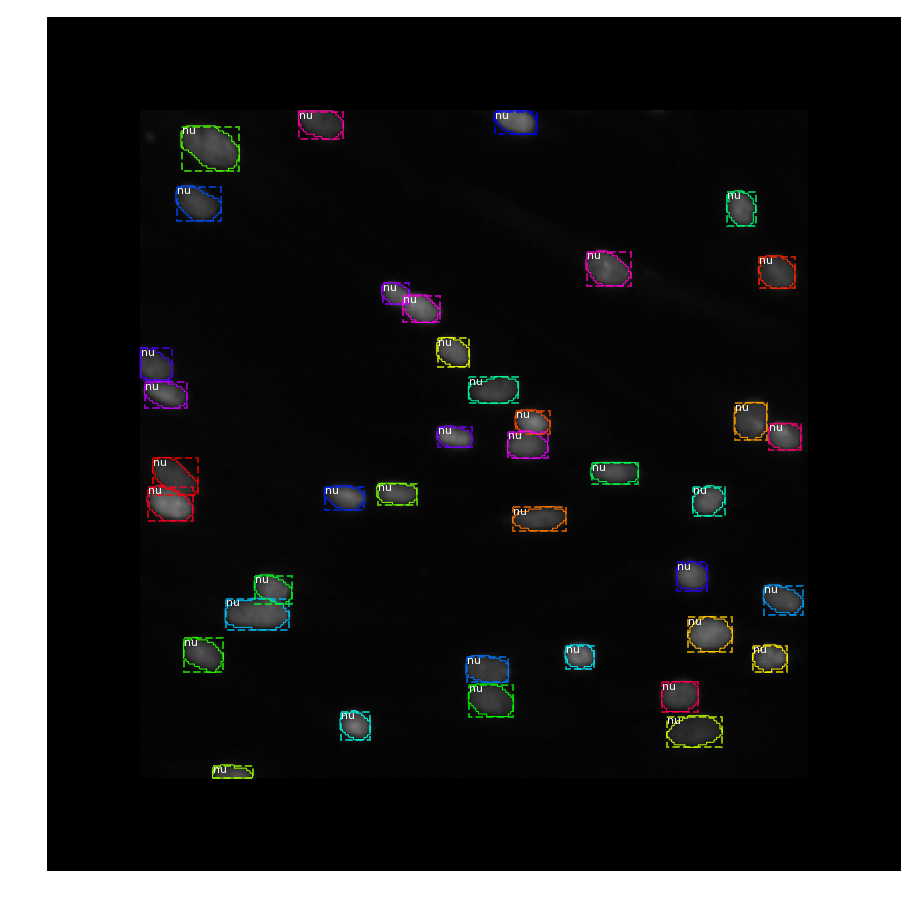

In [15]:
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)

image                    shape: (1024, 1024, 3)       min:    0.00000  max:  126.00000
image_meta               shape: (10,)                 min:    1.00000  max:  912.00000
class_ids                shape: (39,)                 min:    1.00000  max:    1.00000
bbox                     shape: (39, 4)               min:  112.00000  max:  912.00000
mask                     shape: (1024, 1024, 39)      min:    0.00000  max:  255.00000


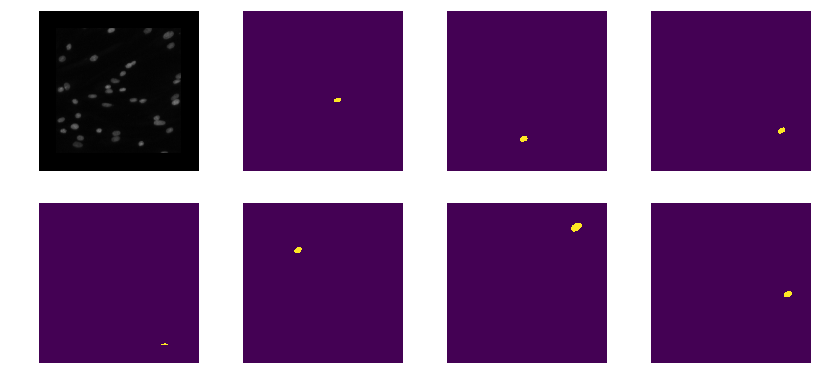

In [16]:
# Add augmentation and mask resizing.
image, image_meta, class_ids, bbox, mask = modellib.load_image_gt(
    dataset, config, image_id, augment=True, use_mini_mask=False)
log("image", image)
log("image_meta", image_meta)
log("class_ids", class_ids)
log("bbox", bbox)
log("mask", mask)

display_images([image]+[mask[:,:,i] for i in range(min(mask.shape[-1], 7))])

(1024, 1024, 39)


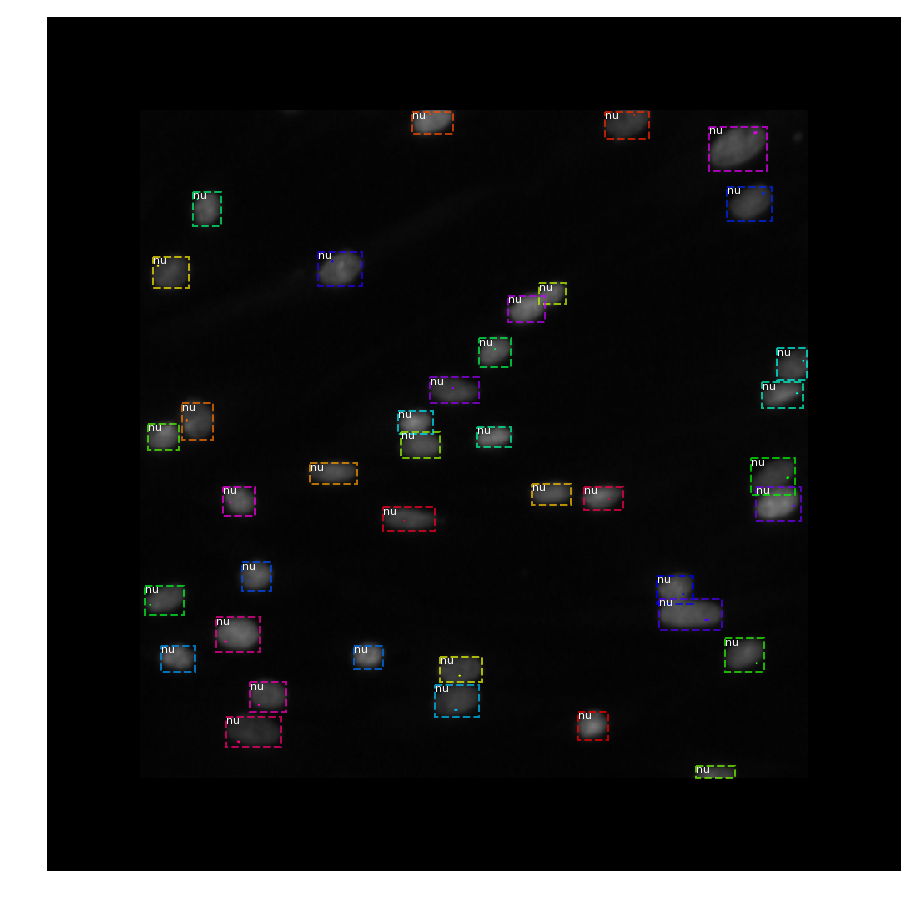

In [17]:
mask = utils.expand_mask(bbox, mask, image.shape)
print(mask.shape)
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)

In [18]:
# Generate Anchors
anchors = utils.generate_pyramid_anchors(config.RPN_ANCHOR_SCALES, 
                                          config.RPN_ANCHOR_RATIOS,
                                          config.BACKBONE_SHAPES,
                                          config.BACKBONE_STRIDES, 
                                          config.RPN_ANCHOR_STRIDE)
print(anchors.shape)
# Print summary of anchors
num_levels = len(config.BACKBONE_SHAPES)
anchors_per_cell = len(config.RPN_ANCHOR_RATIOS)
print("Count: ", anchors.shape[0])
print("Scales: ", config.RPN_ANCHOR_SCALES)
print("ratios: ", config.RPN_ANCHOR_RATIOS)
print("Anchors per Cell: ", anchors_per_cell)
print("Levels: ", num_levels)
anchors_per_level = []
for l in range(num_levels):
    num_cells = config.BACKBONE_SHAPES[l][0] * config.BACKBONE_SHAPES[l][1]
    anchors_per_level.append(anchors_per_cell * num_cells // config.RPN_ANCHOR_STRIDE**2)
    print("Anchors in Level {}: {}".format(l, anchors_per_level[l]))

(261888, 4)
Count:  261888
Scales:  (16, 32, 64, 128, 256)
ratios:  [0.5, 1, 2]
Anchors per Cell:  3
Levels:  5
Anchors in Level 0: 196608
Anchors in Level 1: 49152
Anchors in Level 2: 12288
Anchors in Level 3: 3072
Anchors in Level 4: 768


Visualize anchors of one cell at the center of the feature map of a specific level.

Level 0. Anchors: 196608  Feature map Shape: [256 256]
Level 1. Anchors:  49152  Feature map Shape: [128 128]
Level 2. Anchors:  12288  Feature map Shape: [64 64]
Level 3. Anchors:   3072  Feature map Shape: [32 32]
Level 4. Anchors:    768  Feature map Shape: [16 16]


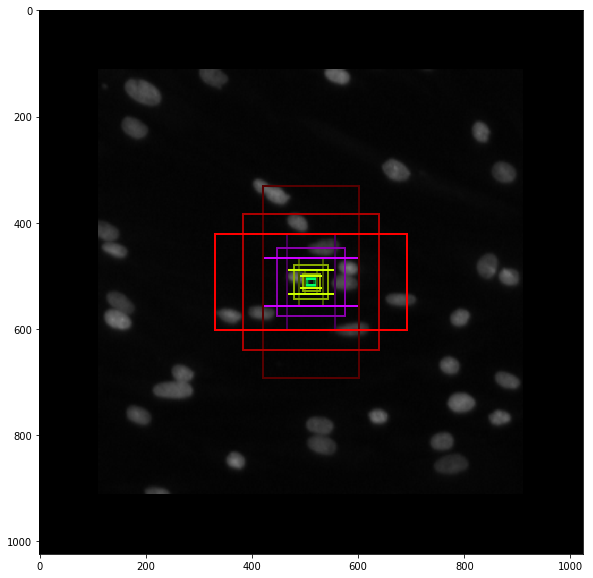

In [19]:
## Visualize anchors of one cell at the center of the feature map of a specific level

# Load and draw random image
# image_id = np.random.choice(dataset.image_ids, 1)[0]
image, image_meta, _, _, _ = modellib.load_image_gt(dataset, config, image_id)
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.imshow(image)
levels = len(config.BACKBONE_SHAPES)

for level in range(levels):
    colors = visualize.random_colors(levels)
    # Compute the index of the anchors at the center of the image
    # from IPython.core.debugger import Tracer; Tracer()()
    level_start = sum(anchors_per_level[:level]) # sum of anchors of previous levels
    level_anchors = anchors[level_start:level_start+anchors_per_level[level]]
    print("Level {}. Anchors: {:6}  Feature map Shape: {}".format(level, level_anchors.shape[0], 
                                                                config.BACKBONE_SHAPES[level]))
    center_cell = config.BACKBONE_SHAPES[level] // 2
    center_cell_index = (center_cell[0] * config.BACKBONE_SHAPES[level][1] + center_cell[1])
    level_center = center_cell_index * anchors_per_cell 
    center_anchor = anchors_per_cell * (
        (center_cell[0] * config.BACKBONE_SHAPES[level][1] / config.RPN_ANCHOR_STRIDE**2) \
        + center_cell[1] / config.RPN_ANCHOR_STRIDE)
    level_center = int(center_anchor)

    # Draw anchors. Brightness show the order in the array, dark to bright.
    for i, rect in enumerate(level_anchors[level_center:level_center+anchors_per_cell]):
        y1, x1, y2, x2 = rect
        p = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=2, facecolor='none',
                              edgecolor=(i+1)*np.array(colors[level]) / anchors_per_cell)
        ax.add_patch(p)


## Data Generator

In [20]:
# Create data generator
random_rois = 2000
g = modellib.data_generator(
    dataset, config, shuffle=False, random_rois=random_rois, 
    batch_size=4,
    detection_targets=True)
# next(g)

In [21]:
# # Uncomment to run the generator through a lot of train images
# # to catch rare errors
# for i in range(len(dataset.image_ids)):
#     print(i)
#     _, _ = next(g)
# # config.RPN_TRAIN_ANCHORS_PER_IMAGE

Checkout image 49. It gives the error:
```
/home/ubuntu/anaconda3/envs/tf_pycoco/lib/python3.6/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)
```
See if you can solve it. And why it's giving this.


In [22]:
# Get Next Image
if random_rois:
    [normalized_images, image_meta, rpn_match, rpn_bbox, gt_class_ids, gt_boxes, gt_masks, rpn_rois, rois], \
    [mrcnn_class_ids, mrcnn_bbox, mrcnn_mask] = next(g)
    
    log("rois", rois)
    log("mrcnn_class_ids", mrcnn_class_ids)
    log("mrcnn_bbox", mrcnn_bbox)
    log("mrcnn_mask", mrcnn_mask)
else:
    [normalized_images, image_meta, rpn_match, rpn_bbox, gt_boxes, gt_masks], _ = next(g)
    
log("gt_class_ids", gt_class_ids)
log("gt_boxes", gt_boxes)
log("gt_masks", gt_masks)
log("rpn_match", rpn_match, )
log("rpn_bbox", rpn_bbox)
image_id = image_meta[0][0]
print("image_id: ", image_id, dataset.image_info[image_id]['id'])

# Remove the last dim in mrcnn_class_ids. It's only added
# to satisfy Keras restriction on target shape.
mrcnn_class_ids = mrcnn_class_ids[:,:,0]

rois                     shape: (4, 512, 4)           min:    0.00000  max: 1023.00000
mrcnn_class_ids          shape: (4, 512, 1)           min:    0.00000  max:    1.00000
mrcnn_bbox               shape: (4, 512, 2, 4)        min:   -3.30769  max:    3.21429
mrcnn_mask               shape: (4, 512, 28, 28, 2)   min:    0.00000  max:    1.00000
gt_class_ids             shape: (4, 100)              min:    0.00000  max:    1.00000
gt_boxes                 shape: (4, 100, 4)           min:    0.00000  max: 1024.00000
gt_masks                 shape: (4, 56, 56, 100)      min:    0.00000  max:    1.00000
rpn_match                shape: (4, 261888, 1)        min:   -1.00000  max:    1.00000
rpn_bbox                 shape: (4, 256, 4)           min:   -2.87682  max:    3.59375
image_id:  0 3b957237bc1e09740b58a414282393d3a91dde996b061e7061f4198fb03dab2e


In [23]:
print(normalized_images.shape)

(4, 1024, 1024, 3)


anchors                  shape: (261888, 4)           min: -181.01934  max: 1141.01934
refined_anchors          shape: (27, 4)               min:  112.00000  max:  912.00000
Positive anchors: 27
Negative anchors: 229
Neutral anchors: 261632
BG                     : 484
nu                     : 28


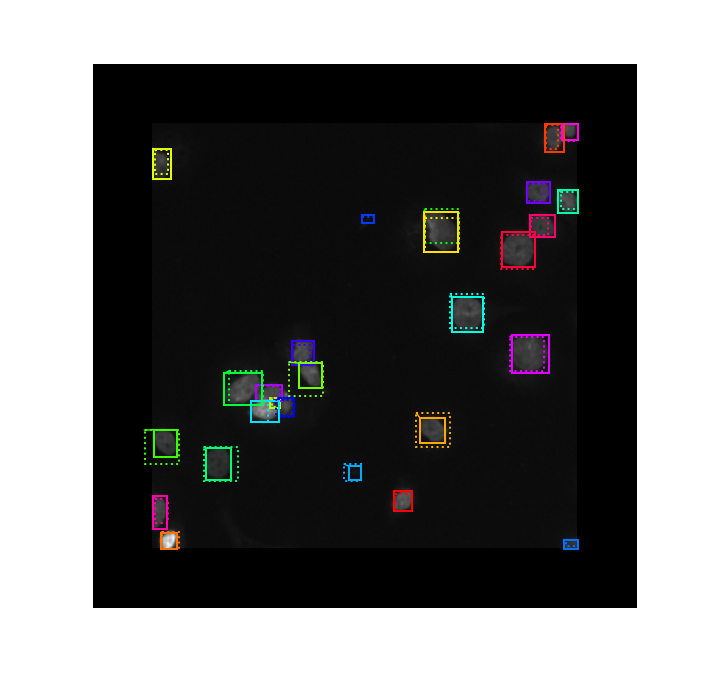

In [24]:
b = 0

# Restore original image (reverse normalization)
sample_image = modellib.unmold_image(normalized_images[b], config)


# Compute anchor shifts.
indices = np.where(rpn_match[b] == 1)[0]
refined_anchors = utils.apply_box_deltas(anchors[indices], rpn_bbox[b, :len(indices)] * config.RPN_BBOX_STD_DEV)
log("anchors", anchors)
log("refined_anchors", refined_anchors)


# Get list of positive anchors
positive_anchor_ids = np.where(rpn_match[b] == 1)[0]
print("Positive anchors: {}".format(len(positive_anchor_ids)))
negative_anchor_ids = np.where(rpn_match[b] == -1)[0]
print("Negative anchors: {}".format(len(negative_anchor_ids)))
neutral_anchor_ids = np.where(rpn_match[b] == 0)[0]
print("Neutral anchors: {}".format(len(neutral_anchor_ids)))

# ROI breakdown by class
for c, n in zip(dataset.class_names, np.bincount(mrcnn_class_ids[b].flatten())):
    if n:
        print("{:23}: {}".format(c[:20], n))

# Show positive anchors
visualize.draw_boxes(sample_image, boxes=anchors[positive_anchor_ids], 
                     refined_boxes=refined_anchors)

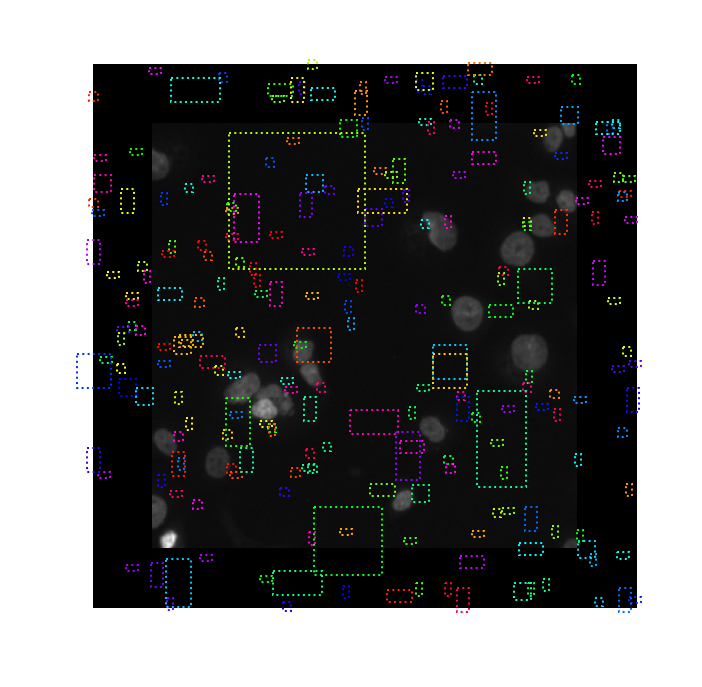

In [25]:
# Show negative anchors
visualize.draw_boxes(sample_image, boxes=anchors[negative_anchor_ids])

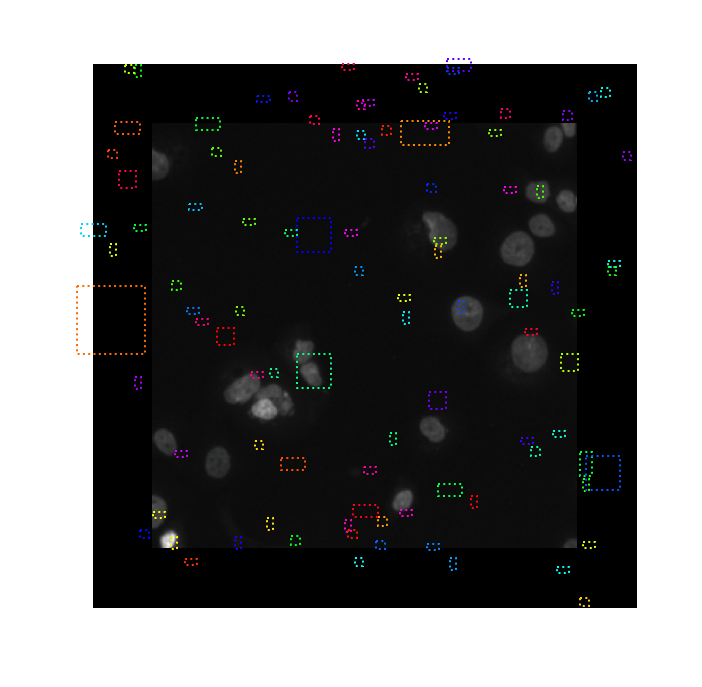

In [26]:
# Show neutral anchors. They don't contribute to training.
visualize.draw_boxes(sample_image, boxes=anchors[np.random.choice(neutral_anchor_ids, 100)])

## ROIs

Positive ROIs:  28
Negative ROIs:  484
Positive Ratio: 0.05
Unique ROIs: 512 out of 512


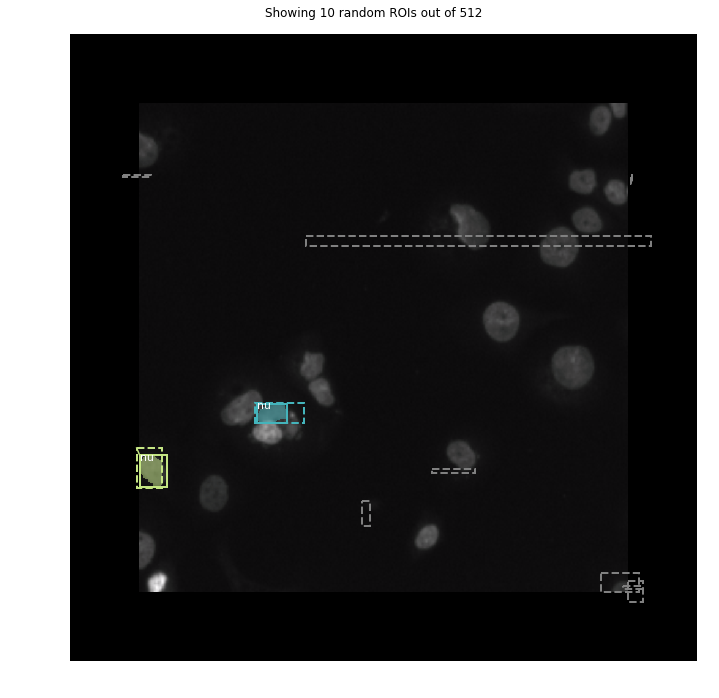

In [27]:
if random_rois:
    # Class aware bboxes
    bbox_specific = mrcnn_bbox[b, np.arange(mrcnn_bbox.shape[1]), mrcnn_class_ids[b], :]
    
    # Refined ROIs
    refined_rois = utils.apply_box_deltas(rois[b].astype(np.float32), bbox_specific[:,:4] * config.BBOX_STD_DEV)

    # Class aware masks
    mask_specific = mrcnn_mask[b, np.arange(mrcnn_mask.shape[1]), :, :, mrcnn_class_ids[b]]
    
    visualize.draw_rois(sample_image, rois[b], refined_rois, mask_specific, mrcnn_class_ids[b], dataset.class_names)
    
    # Any repeated ROIs?
    rows = np.ascontiguousarray(rois[b]).view(np.dtype((np.void, rois.dtype.itemsize * rois.shape[-1])))
    _, idx = np.unique(rows, return_index=True)
    print("Unique ROIs: {} out of {}".format(len(idx), rois.shape[1]))

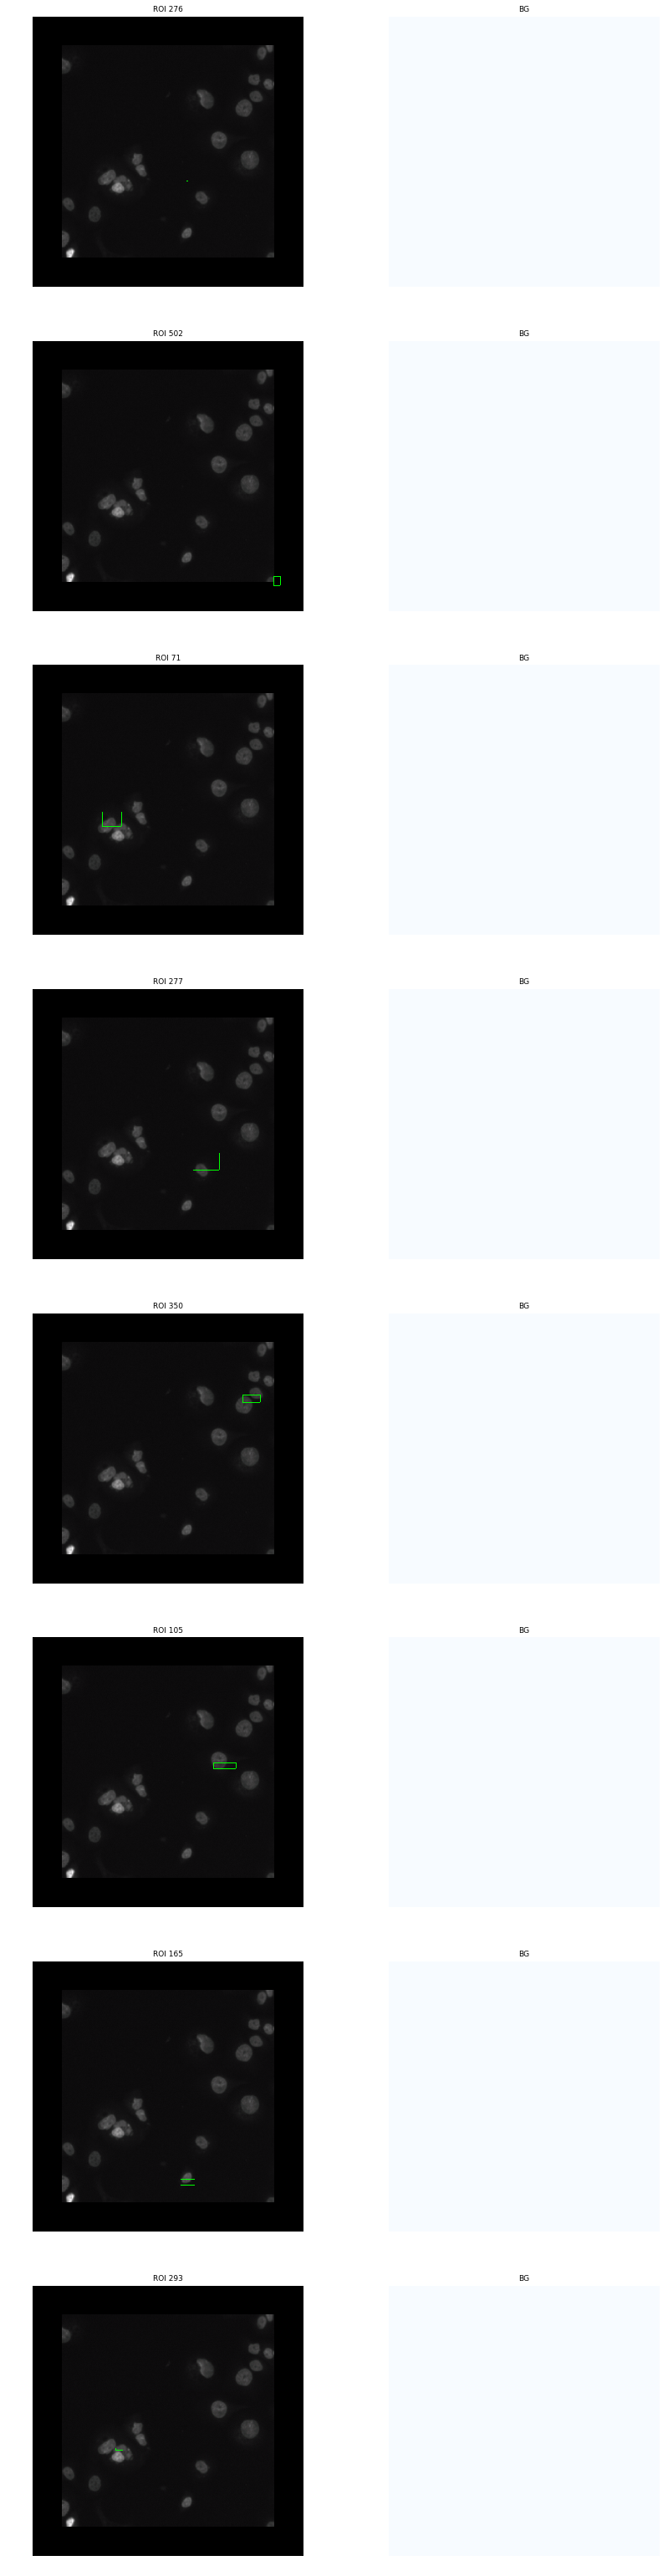

In [28]:
if random_rois:
    # Dispalay ROIs and corresponding masks and bounding boxes
    ids = random.sample(range(rois.shape[1]), 8)

    images = []
    titles = []
    for i in ids:
        image = visualize.draw_box(sample_image.copy(), rois[b,i,:4].astype(np.int32), [255, 0, 0])
        image = visualize.draw_box(image, refined_rois[i].astype(np.int64), [0, 255, 0])
        images.append(image)
        titles.append("ROI {}".format(i))
        images.append(mask_specific[i] * 255)
        titles.append(dataset.class_names[mrcnn_class_ids[b,i]][:20])

    display_images(images, titles, cols=2, cmap="Blues", interpolation="none")

In [29]:
# Check ratio of positive ROIs in a set of images.
if random_rois:
    limit = 10
    temp_g = modellib.data_generator(
        dataset, config, shuffle=True, random_rois=10000, 
        batch_size=1, detection_targets=True)
    total = 0
    for i in range(limit):
        _, [ids, _, _] = next(temp_g)
        positive_rois = np.sum(ids[0] > 0)
        total += positive_rois
        print("{:5} {:5.2f}".format(positive_rois, positive_rois/ids.shape[1]))
    print("Average percent: {:.2f}".format(total/(limit*ids.shape[1])))

  149  0.29
  117  0.23
  112  0.22
  139  0.27
  148  0.29
  130  0.25
  134  0.26
  105  0.21
  131  0.26
  152  0.30
Average percent: 0.26


In [30]:
classes = pd.read_csv('classes.csv')


In [ ]:
data_train, data_val = dataset.extract_train_val()

In [189]:
def load_validation(val_size):
    """
    Loads validation set from Allen's `classes.csv` file
    Arguments:
        val_size: the size of the validation set
    returns:
        dataset_val: the Validation dataset directly in the NucleiDataset format.
        It should contain at least one image from the different experiment conditions.
    """
    cl_df = pd.read_csv('classes.csv')
    cl_df['im_type'] = cl_df.foreground.str.cat(cl_df.background)
    classes_count = cl_df.groupby(['im_type']).count()
    # Obtain only from train set
    train_ids = [im+'.png' for im in dataset.real_to_id.keys()]
    train_classes = cl_df.loc[np.where(np.in1d(cl_df['filename'], train_ids))[0]]
    test_classes = cl_df.loc[np.where(~np.in1d(cl_df['filename'], train_ids))[0]]
    train_count = train_classes.groupby(['im_type']).count()
    test_count = test_classes.groupby(['im_type']).count()
    X,y = train_classes['filename'],train_classes['im_type']
    sss = StratifiedShuffleSplit(n_splits=1, test_size=val_size, random_state=0)
    for train_index, val_index in sss.split(X, y):
        # print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    # train_classes = cl_df.loc[np.where(cl_df == train_ids)]
    
    return X_train, X_val
    

In [204]:
train, val = load_validation(0.2)
# print(train.shape)
# print(val.shape)
# print(val)
# print(dataset.copy())
dataset_train = copy.deepcopy(dataset)

In [228]:
real_ids = list(dataset.real_to_id.keys())
print(real_ids[0])
dataset.image_info[0]
for i in range(len(dataset.image_info)):
    if real_ids[i] != dataset.image_info[i]['id']:
        print("ID Discrepancy found, {}, {}".format(real_ids[i],))

3b957237bc1e09740b58a414282393d3a91dde996b061e7061f4198fb03dab2e


In [230]:
real_ids[1]

'c15c652c08153fb781a5349123ab8f80bb2a8680a41eb8e89e547ae01b7a5441'

In [227]:
train[0]

'd32ea6d318626ca14a967d0c1ad3218aebfe636624a8d1173f5150dde8ff38cf.png'

In [ ]:
exec("train")[0]

In [213]:
train_bool = np.in1d([im+'.png' for im in dataset.real_to_id.keys()], train)
print(len(dataset_train.image_info))
dataset_train.image_info = []
dataset_train.image_ids = []
for idx,i in enumerate(train_bool):
    if i:
        real_id = dataset.real_to_id.keys()[idx]
        dataset_train.image_ids.append(idx)
        img_info = {"source":"nuclei_train", "id": real_id, "path":self.image_info[idx]['path'], "m_path": self.image_info[idx]['path']}
        dataset_train.image_info
dataset_train.image_info = [dataset_train.image_info[i] for idx,i in enumerate(train_bool) if i]

670


/home/ubuntu/anaconda3/envs/tf_pycoco/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  This is separate from the ipykernel package so we can avoid doing imports until


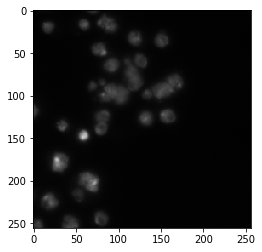

In [188]:
plt.imshow(img_1)

In [155]:
cl_df = pd.read_csv('classes.csv')
cl_df['im_type'] = cl_df.foreground.str.cat(cl_df.background)
classes_count = cl_df.groupby(['im_type']).count()
# Obtain only from train set
train_ids = [im+'.png' for im in dataset.real_to_id.keys()]
# print(train_ids[:5])
train_stats = cl_df.loc[np.where(np.in1d(cl_df['filename'], train_ids))[0]]
test_stats = cl_df.loc[np.where(~np.in1d(cl_df['filename'], train_ids))[0]]

train_count = train_stats.groupby(['im_type']).count()
test_count = test_stats.groupby(['im_type']).count()
print(train_count.shape)
print(test_count)
# print(classes_count)
print(cl_df.columns)
X,y = train_stats['filename'],train_stats['im_type']
y.shape,X.shape
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
    for train_index, test_index in sss.split(X, y):
        # print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
print(X_train.shape, X_test.shape)
print(y_test.groupby(y_test).count())

(4, 3)
              filename  foreground  background
im_type                                       
purplepurple         1           1           1
purplewhite          3           3           3
purpleyellow         8           8           8
whiteblack          53          53          53
Index(['filename', 'foreground', 'background', 'im_type'], dtype='object')
(536,) (134,)
im_type
blackwhite        3
purplepurple     14
purplewhite       8
whiteblack      109
Name: im_type, dtype: int64


In [150]:
y_test = y_test.groupby(y_test).count()
y_train = y_train.groupby(y_train).count()
print(train_count)
print(y_test/y_test.sum())
print(y_train/y_train.sum())
print(train_count/train_count.sum())
print(test_count/test_count.sum())

              filename  foreground  background
im_type                                       
blackwhite          16          16          16
purplepurple        70          70          70
purplewhite         38          38          38
whiteblack         546         546         546
im_type
blackwhite      0.022388
purplepurple    0.104478
purplewhite     0.059701
whiteblack      0.813433
Name: im_type, dtype: float64
im_type
blackwhite      0.024254
purplepurple    0.104478
purplewhite     0.055970
whiteblack      0.815299
Name: im_type, dtype: float64
              filename  foreground  background
im_type                                       
blackwhite    0.023881    0.023881    0.023881
purplepurple  0.104478    0.104478    0.104478
purplewhite   0.056716    0.056716    0.056716
whiteblack    0.814925    0.814925    0.814925
              filename  foreground  background
im_type                                       
purplepurple  0.015385    0.015385    0.015385
purplewhite   0.046

In [96]:
# error = False
# for i in range(train_stats.shape[0]):
#     if not train_stats.iloc[i,0] in train_ids:
#         print('Error Detected')
#         error = True
# 'd32ea6d318626ca14a967d0c1ad3218aebfe636624a8d1173f5150dde8ff38cf.png' in train_ids
for fn in cl_df['filename'].loc[np.where(cl_df['im_type'] == 'purpleyellow')[0]]:
    if fn in train_ids:
        print("purpleyellow in train {}".format(fn))

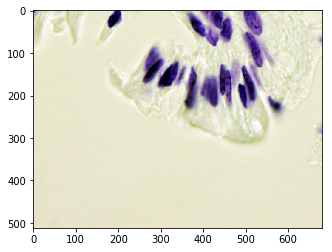

In [101]:
plt.imshow(dataset_test.load_image("f5effed21f671bbf4551ecebb7fe95f3be1cf09c16a60afe64d2f0b95be9d1eb"))

In [71]:
print(np.in1d.__doc__)


    Test whether each element of a 1-D array is also present in a second array.

    Returns a boolean array the same length as `ar1` that is True
    where an element of `ar1` is in `ar2` and False otherwise.

    We recommend using :func:`isin` instead of `in1d` for new code.

    Parameters
    ----------
    ar1 : (M,) array_like
        Input array.
    ar2 : array_like
        The values against which to test each value of `ar1`.
    assume_unique : bool, optional
        If True, the input arrays are both assumed to be unique, which
        can speed up the calculation.  Default is False.
    invert : bool, optional
        If True, the values in the returned array are inverted (that is,
        False where an element of `ar1` is in `ar2` and True otherwise).
        Default is False. ``np.in1d(a, b, invert=True)`` is equivalent
        to (but is faster than) ``np.invert(in1d(a, b))``.

        .. versionadded:: 1.8.0

    Returns
    -------
    in1d : (M,) ndarray, bool
    